In [4]:
import pandas as pd
import numpy as np
from matplotlib import pyplot
df=pd.read_csv('C:\\masters\\Master_projects\\research_lab\\Dataexploration1.csv')
df=df.rename(columns = {'source':'Source'})
df

,date,Source,Article,author,Label
0,2019-01-30,politico,‘ get dcardin ’ person move avoid new shutdown...,Burgess Everett,Real
1,2019-01-30,politico,org norp postpon date retreat amid border talk...,hcaygle@politico.com (Heather Caygle),Real
2,2019-01-30,politico,org signal pagpe rate hike send stock soaringt...,vguida@politico.com (Victoria Guida),Real
3,2019-01-30,politico,norp take hard line border barrier money shutd...,jscholtes@politico.com (Jennifer Scholtes),Real
4,2019-01-30,politico,person dig ocasiocortezthey detest stand for t...,bschreckinger@politico.com (Ben Schreckinger),Real
...,...,...,...,...,...
10441,2019-12-30,politicususa,person prais corrupt norp leader wore blackfac...,Jason Easley,Unlabel
10442,2019-12-30,skynewspolitics,person were resist personperson step leadershi...,NaN,Fake
10443,2019-12-12,skynewspolitics,next labour leader corbynwho next labour leade...,NaN,Fake
10444,2019-12-05,politico,opinion norp speed defeat impeachmentwhi rgpeh...,Charles Sykes,Real


In [5]:
df.groupby(['Label','Source']).size()

Label    Source         
Fake     skynewspolitics    2269
Real     buzzfeed           1741
         politico           2388
Unlabel  politicususa       4048
dtype: int64

In [6]:
import random
import matplotlib.pyplot as plt

def draw_barchart(df, target,title,ylabel):
    # Prepare Data
    title=title
    ylabel=ylabel
    df = df.groupby(target).size().reset_index(name='counts')
    df = df.sort_values(by=['counts'], ascending = False)
    n = df[target].unique().__len__()+1
    all_colors = list(plt.cm.colors.cnames.keys())
    random.seed(100)
    c = random.choices(all_colors, k=n)

    # Plot Bars
    
    plt.figure(figsize=(10,5), dpi= 80)
    plt.bar(df[target], df['counts'], color=c, width=.5)
    for i, val in enumerate(df['counts'].values):
        plt.text(i, val, int(val), horizontalalignment='center', verticalalignment='bottom', fontdict={'fontweight':500, 'size':12})

    # Decoration
    plt.gca().set_xticklabels(df[target], rotation=60, horizontalalignment= 'right')
    plt.title(title, fontsize=22)
    plt.ylabel(ylabel)
#     plt.ylim(0, 45)
    plt.show()

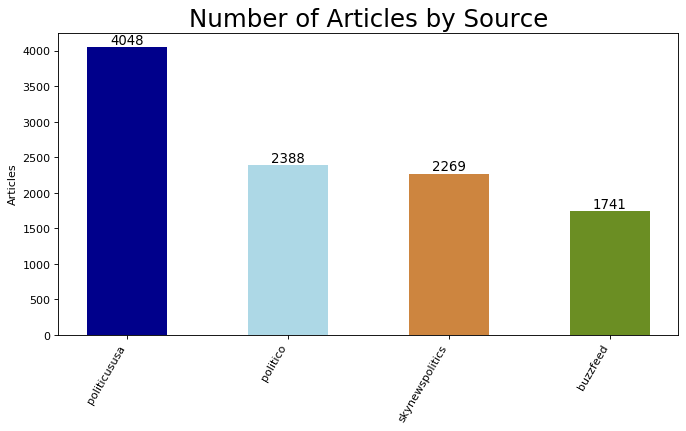

In [7]:
draw_barchart(df,'Source','Number of Articles by Source','Articles')

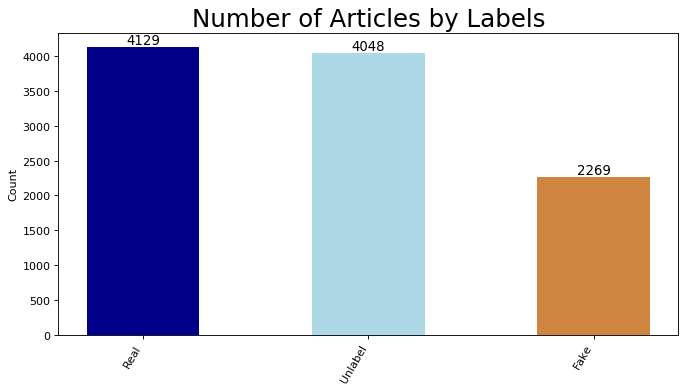

In [8]:
draw_barchart(df,'Label','Number of Articles by Labels','Count')

In [9]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

def box_plot(dataframe,xlabel,x_sub_label,xlab,ylab,title,xdim=10,ydim=5):
    df=dataframe
    df['Count_words'] = df['Article'].str.split().str.len()
    fig_dims = (xdim, ydim)
    fig, ax = plt.subplots(figsize=fig_dims)
    _ = sns.boxplot(x=xlabel, y='Count_words', hue=x_sub_label,data=df)
    # Label the axes
    plt.xlabel(xlab)
    plt.ylabel(ylab)
    plt.title(title)
    plt.show()


C:\Users\chidi\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


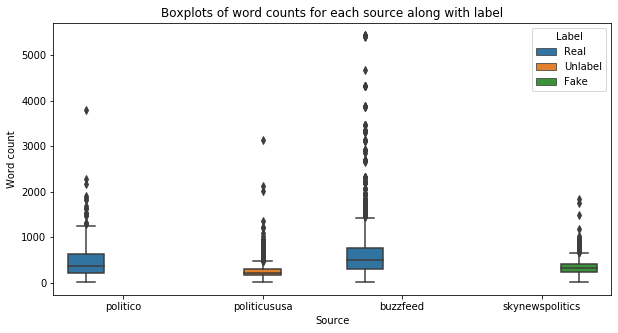

In [10]:
box_plot(df,'Source','Label','Source','Word count','Boxplots of word counts for each source along with label',10,5)

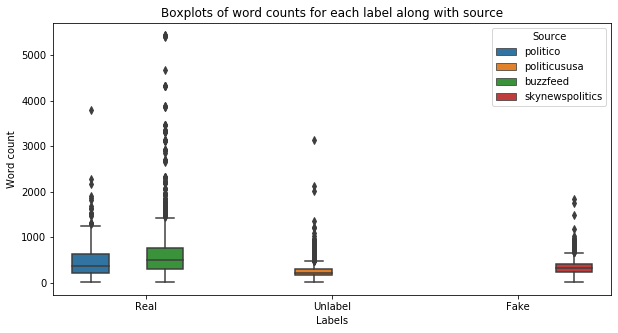

In [11]:
box_plot(df,'Label','Source','Labels','Word count','Boxplots of word counts for each label along with source',10,5)

In [12]:
def box_plot_per(dataframe,xlabel,xlab,ylab,title,xdim=10,ydim=5):
    df=dataframe
    df['Count_words'] = df['Article'].str.split().str.len()
    fig_dims = (xdim, ydim)
    fig, ax = plt.subplots(figsize=fig_dims)
    _ = sns.boxplot(x=xlabel, y='Count_words',data=df)
    # Label the axes
    plt.xlabel(xlab)
    plt.ylabel(ylab)
    plt.title(title)
    plt.show()


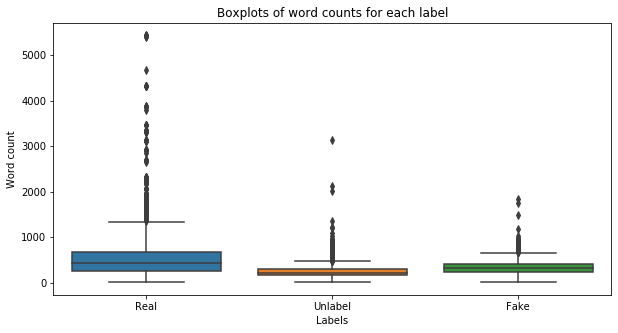

In [13]:
box_plot_per(df,'Label','Labels','Word count','Boxplots of word counts for each label',10,5)

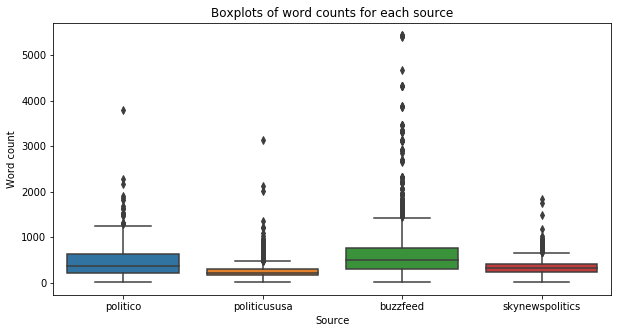

In [14]:
box_plot_per(df,'Source','Source','Word count','Boxplots of word counts for each source',10,5)

In [15]:
# Import the libraries
import matplotlib.pyplot as plt
import seaborn as sns
def distribution_plot(dataframe,xlab,ylab,title):
    df=dataframe
    df['Count_words'] = df['Article'].str.split().str.len()
# matplotlib histogram
    plt.hist(df['Count_words'], color = 'blue', edgecolor = 'black',
         bins = int(180/5))

# seaborn histogram
    sns.distplot(df['Count_words'], hist=True, kde=False, 
             bins=int(180/5), color = 'blue',
             hist_kws={'edgecolor':'black'})
# Add labels
    plt.title(title)
    plt.xlabel(xlab)
    plt.ylabel(ylab)    

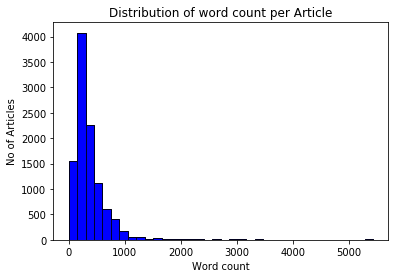

In [16]:
distribution_plot(df,'Word count','No of Articles','Distribution of word count per Article')

In [35]:
# Make a separate list for each airline
def distribution_plot_source(dataframe,xlab,ylab,title):
    df=dataframe
    df['Count_words'] = df['Article'].str.split().str.len()
    x1 = list(df[df['Source'] == 'skynewspolitics']['Count_words'])
    x2 = list(df[df['Source'] == 'buzzfeed']['Count_words'])
    x3 = list(df[df['Source'] == 'politico']['Count_words'])
    x4 = list(df[df['Source'] == 'politicususa']['Count_words'])

    
# Assign colors for each airline and the names
    colors = ['#E69F00','#ADD439','#646464','#748EC4']
    names = ['skynewspolitics', 'buzzfeed', 'politico','politicususa']
         
# Make the histogram using a list of lists
# Normalize the flights and assign colors and names
    plt.xlim(10, 4000)
    plt.hist([x1, x2, x3, x4], bins = int(180/15), normed=False,
         color = colors, label=names)

# Plot formatting
    plt.legend()
    plt.xlabel(xlab)
    plt.ylabel(ylab)
    plt.title(title)
    plt.savefig('C:\\masters\\Master_projects\\research_lab\\dataset1.png')

C:\Users\chidi\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.


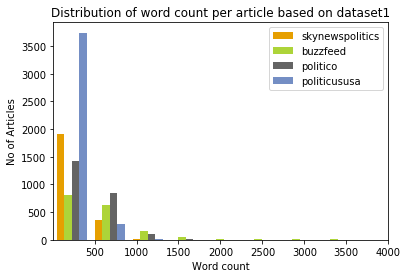

In [36]:
distribution_plot_source(df,'Word count','No of Articles','Distribution of word count per article based on dataset1')

In [37]:
def distribution_plot_label(dataframe,xlab,ylab,title):
    df=dataframe
    
# Make a separate list for each airline
    df['Count_words'] = df['Article'].str.split().str.len()
    x1 = list(df[df['Label'] == 'Real']['Count_words'])
    x2 = list(df[df['Label'] == 'Fake']['Count_words'])
    x3 = list(df[df['Label'] == 'Unlabel']['Count_words'])


# Assign colors for each airline and the names
    colors = ['#E69F00', '#56B4E9', '#F0E442']
    names = ['Real','Fake','Unlabel']
         
# Make the histogram using a list of lists
# Normalize the flights and assign colors and names
    plt.xlim(10, 5000)
    plt.hist([x1, x2, x3], bins = int(180/15), normed=False,
         color = colors, label=names)

# Plot formatting
    plt.legend()
    plt.xlabel(xlab)
    plt.ylabel(ylab)
    plt.title(title)
    plt.savefig('C:\\masters\\Master_projects\\research_lab\\dataset1_labels.png')

C:\Users\chidi\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.


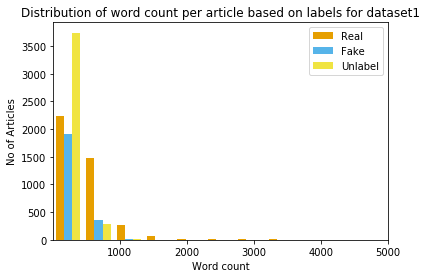

In [38]:
distribution_plot_label(df,'Word count','No of Articles','Distribution of word count per article based on labels for dataset1')  

In [58]:
def draw_barchart_words(df, target,title,ylabel):
    # Prepare Data
    title=title
    ylabel=ylabel
    df['Count_words'] = df['Article'].str.split().str.len()
    df=df.groupby([target])['Count_words'].sum().reset_index()
    df = df.sort_values(by=['Count_words'], ascending = False)
    n = df[target].unique().__len__()+1
    all_colors = list(plt.cm.colors.cnames.keys())
    random.seed(100)
    c = random.choices(all_colors, k=n)

    # Plot Bars
    
    plt.figure(figsize=(10,5), dpi= 80)
    plt.bar(df[target], df['Count_words'], color=c, width=.5)
    for i, val in enumerate(df['Count_words'].values):
        plt.text(i, val, int(val), horizontalalignment='center', verticalalignment='bottom', fontdict={'fontweight':500, 'size':12})

    # Decoration
    plt.gca().set_xticklabels(df[target], rotation=60, horizontalalignment= 'right')
    plt.title(title, fontsize=22)
    plt.ylabel(ylabel)
#     plt.ylim(0, 45)
    plt.show()

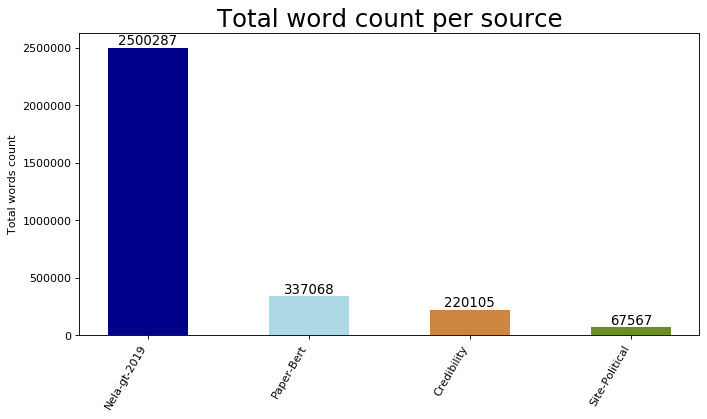

In [59]:
draw_barchart_words(df, 'Source','Total word count per source','Total words count')

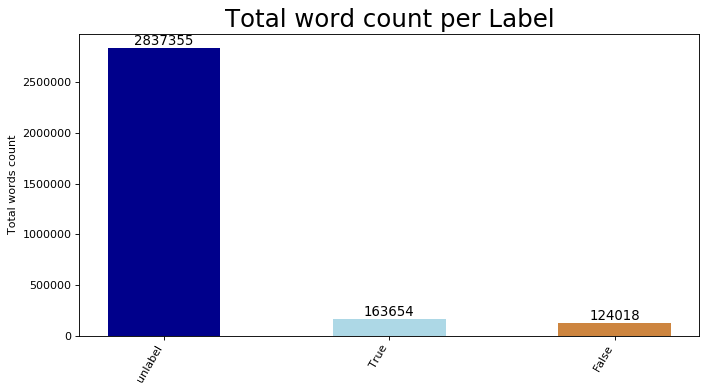

In [60]:
draw_barchart_words(df, 'Label','Total word count per Label','Total words count')